In [139]:
#Import relevant libraries
import os, sys
print(os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

/Users/manish/Desktop/Python/finance


<ul>
<li> Extracting data from quandl </li>
<li> Creating pandas dataframe consisting of Nifty and Eicher Motors price</li>
<li> Deriving everday returns to get a sense of dynamic nature of markets </li>
<li> Analyzing returns distribution</li>
</ul>


In [6]:
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

df1 = web.DataReader("NSE/EICHERMOT", 'quandl', start, end)
df2 = web.DataReader("NSE/NIFTYBEES", 'quandl', start, end)

In [8]:
price = pd.concat((df1['Close'],df2['Close']), axis=1)
price.columns = ['EICHERMOT', 'NIFTYBEES']
price.head()

,EICHERMOT,NIFTYBEES
Date,,
2019-01-04,20103.60,1124.91
2019-01-03,20211.45,1118.35
2019-01-02,21162.30,1129.73
2019-01-01,23195.10,1139.84
2018-12-31,23158.35,1136.75


In [10]:
#Arrange the data in ascending order
price=price.iloc[::-1]
print(price.head())

#Compute stock returns and print the returns in percentage format
returns = price.pct_change()[1:]
print (returns.head().round(4)*100)

            EICHERMOT  NIFTYBEES
Date                            
2018-01-02      -4.09      -0.33
2018-01-03       0.50       0.16
2018-01-04      -0.85       0.51
2018-01-05       2.33       0.50
2018-01-08      -0.14       0.48


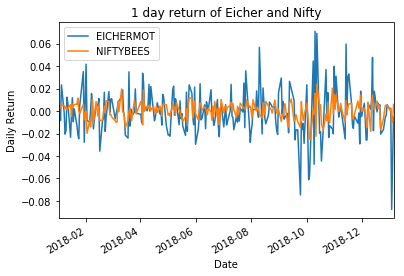

In [99]:
returns.plot()
plt.title("1 day return of Eicher and Nifty")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

EICHERMOT   -0.00138
NIFTYBEES    0.00020
dtype: float64


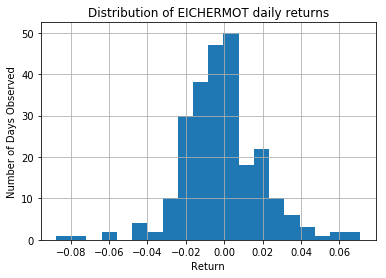

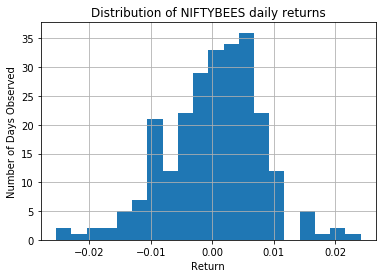

In [153]:
print(returns.mean())

plt.hist(returns['EICHERMOT'],bins=20)
plt.grid()
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Distribution of EICHERMOT daily returns')
plt.show()

plt.hist(returns['NIFTYBEES'],bins=20)
plt.grid()
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Distribution of NIFTYBEES daily returns')
plt.show()



<heading><b>Estimating Beta</b></heading>

The standard procedure for estimating betas is to regress stock returns (R<sub>j</sub>) against market returns (R<sub>m</sub>)

R<sub>j</sub> = a + b R<sub>m</sub>

Here b, the slope of the regression represents the beta of the stock(EICHERMOT in this case).



In [154]:
# from statsmodels import api as sm
import statsmodels.api as sm
from statsmodels import regression

In [155]:
# returns['NIFTYBEES']

X = returns['NIFTYBEES']
Y = returns['EICHERMOT']

In [156]:
def linreg(x,y):
    x=np.array(x)
    y=np.array(y)
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    a = model.params[0]
    b = model.params[1]
    x = x[:, 1]
    print(model.summary())
    return a, b

In [163]:
a, b = linreg(X,Y)

print('\nbeta: ',str(beta))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     80.53
Date:                Tue, 07 May 2019   Prob (F-statistic):           7.39e-17
Time:                        22:28:50   Log-Likelihood:                 648.69
No. Observations:                 249   AIC:                            -1293.
Df Residuals:                     247   BIC:                            -1286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.446      0.1

<b>Idiosyncratic Risk</b>

The R squared (R<sup>2</sup>) of the regression provides an estimate of the proportion of the risk of a firm that can be attributed to market risk. The balance (1 - R<sup>2</sup>) can be attributed to firm specific risk known by the name of idiosyncratic risk.

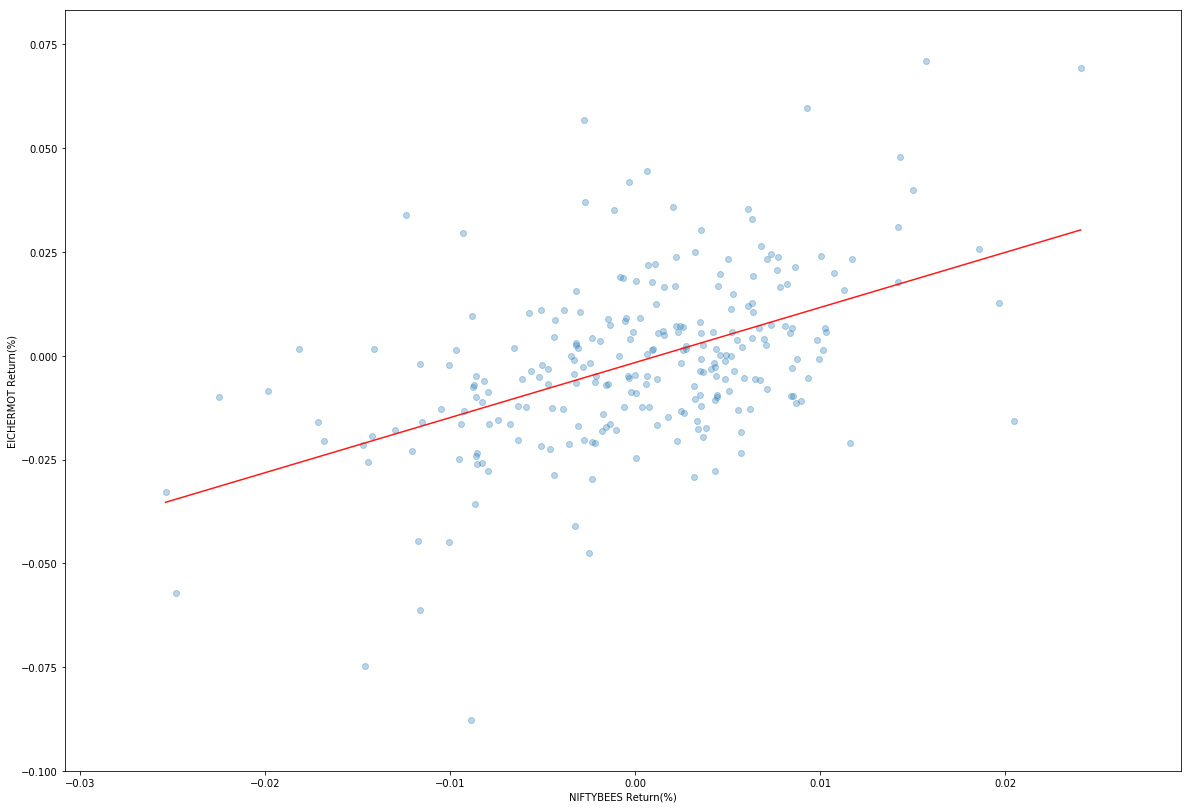

In [126]:
X2 = np.linspace(X.min(),X.max(),100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(20,14))
plt.scatter(X, Y,alpha=0.3)
plt.xlabel('NIFTYBEES Return(%)')
plt.ylabel('EICHERMOT Return(%)')

plt.plot(X2, Y_hat, 'r', alpha=0.9)

plt.show()

<b>What's next?</b>

Given the understanding of basics, it's time to ponder on bigger questions.

<ul>
<li>By taking a rolling 60 day window, how is the trend of beta looking over time?</li>
<li>How is Idiosyncratic Risk evolving over time?</li>
<li>Does an increase in Idiosyncratic Risk indicate an upcoming short opportunity?</li>
</ul>